In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
#the important aspects of the analysis will be discussed in the report

In [2]:
#we get the data from the solving attempts, by iterating over the files and saving the information saved in the file name and the last row of the csv file for now
folder_path = 'logs/solving_attemps_final_12x12/'
file_list = os.listdir(folder_path)
data = []


for file_name in file_list:
    if file_name.endswith('.csv'):        
        li = file_name.replace('.csv', '').split('-')        
        file_path = os.path.join(folder_path, file_name)
        
        
        
        df= pd.read_csv(file_path, sep=';')

        for item in [df['generations'].iloc[-1], df['average_fitness'].iloc[-1], df['best_fitness'].iloc[-1], df['time'].iloc[-1]]:
            li.append(item)

        data.append(li)

In [3]:
df = pd.DataFrame(columns=['id', 'difficulty', 'size', 'selection_method', 'elitism', 'elitism_percentage', 'tournament_size', 'T', 'cooling_rate','crossover_rate', 'crossover_method', 'mutation_rate', 'mutation_method', 'generations_earlystop', 'generations', 'average_fitness', 'best_fitness', 'time'], data=data)
df

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
0,1,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,13,14,0,102.054076
1,1,hard,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,249,9,4,2189.066396
2,1,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,66,11,0,537.813952
3,10,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,13,14,0,126.493553
4,10,hard,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,180,6,2,1684.881643
5,10,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,63,18,0,579.926937
6,11,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,12,16,0,94.881119
7,11,hard,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,249,33,4,3224.682512
8,11,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,66,13,0,544.080436
9,12,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,13,14,0,121.029524


In [4]:
#here we can see that normal sudoku was harder to solve than the hard sudoku
means = df.groupby('difficulty')['best_fitness'].mean().reset_index()
medians = df.groupby('difficulty')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means   difficulty  best_fitness
0       easy      0.000000
1       hard      4.846154
2     normal      0.307692 

medians   difficulty  best_fitness
0       easy           0.0
1       hard           4.0
2     normal           0.0


In [5]:
df.groupby('difficulty')['best_fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
difficulty,,,,,,,,
easy,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
hard,13.0,4.846154,3.508232,2.0,4.0,4.0,4.0,16.0
normal,13.0,0.307692,0.751068,0.0,0.0,0.0,0.0,2.0


In [6]:
solved = []

for i in range(len(df)):
    if df.loc[i]['best_fitness'] == 0: 
        solved.append('Yes')
    
    else:
        solved.append('No')

df['solved'] = solved

In [7]:
df.groupby('difficulty')['solved'].value_counts()

difficulty  solved
easy        Yes       13
hard        No        13
normal      Yes       11
            No         2
Name: count, dtype: int64

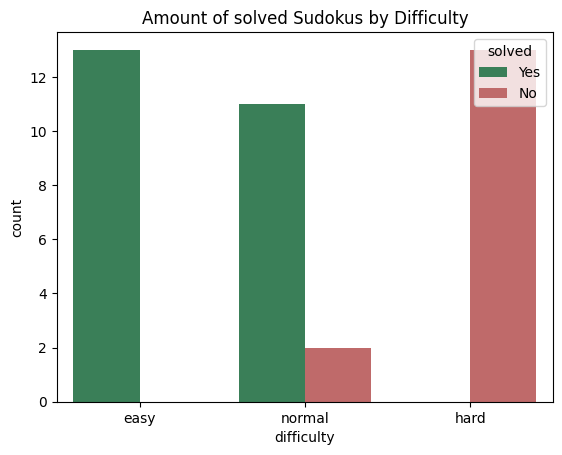

In [8]:
ax = sns.countplot(data=df, x='difficulty', order = ['easy', 'normal', 'hard'], hue='solved', palette=['seagreen','indianred']).set_title('Amount of solved Sudokus by Difficulty')

In [9]:
import os
import pandas as pd

#we get the data from the solving attempts, by iterating over the files and saving the information saved in the file name
#and this time for every row in the csv file
folder_path = 'logs/solving_attemps_final_12x12/'
file_list = os.listdir(folder_path)
data = []


for file_name in file_list:
    if file_name.endswith('.csv'):        
        li = file_name.replace('.csv', '').split('-')        
        file_path = os.path.join(folder_path, file_name)
        
        
        
        df= pd.read_csv(file_path, sep=';')

        for i in range(len(df)):
            li = file_name.replace('.csv', '').split('-') 
            for item in [df['generations'].iloc[i], df['average_fitness'].iloc[i], df['best_fitness'].iloc[i], df['time'].iloc[i]]:

                li.append(item)
        
            data.append(li)

        

In [10]:
df = pd.DataFrame(columns=['id', 'difficulty', 'size', 'selection_method', 'elitism', 'elitism_percentage', 'tournament_size', 'T', 'cooling_rate','crossover_rate', 'crossover_method', 'mutation_rate', 'mutation_method', 'generations_earlystop', 'generations', 'average_fitness', 'best_fitness', 'time'], data=data)
df

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
0,1,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,0,39,20,7.611626
1,1,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,1,36,20,14.254440
2,1,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,2,34,18,21.639097
3,1,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,3,32,17,28.949598
4,1,easy,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,4,30,14,36.204497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,9,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,57,18,3,523.616769
4502,9,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,58,17,2,531.687455
4503,9,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,59,16,2,541.070591
4504,9,normal,5000,fps,True,0.13,None,None,None,0.9,a_bit_of_all_crossover,0.03,a_bit_of_all_mutation,50,60,14,2,550.436945


In [11]:

#since some sudokus were solved we are missing out on the full generations for some sudokus
#thats why we artificially make the generations go from 0 to 250 for every sudoku, where as the best fitness from the last generation will be set as the 
#best fitness for the added generations

#here we first create a data frame with all possible configurations and then just merge it
ids = df['id'].unique()
difficulties = df['difficulty'].unique()
generations = range(250)
all_combinations = pd.MultiIndex.from_product([ids, difficulties, generations], names=['id', 'difficulty', 'generations']).to_frame(index=False)
df_full = pd.merge(all_combinations, df, on=['id', 'difficulty', 'generations'], how='left')


# then we get the minimum value by id/difficulty pair and replace the NAs from the merging with the min value 
df_full['best_fitness2'] = df_full.groupby(['id', 'difficulty'])['best_fitness'].transform('min')
df_full['best_fitness'].fillna(df_full['best_fitness2'], inplace=True)
df = df_full.drop(columns=['best_fitness2'])

In [12]:
grouped = df.groupby(['difficulty', 'generations'])['best_fitness'].describe().reset_index()

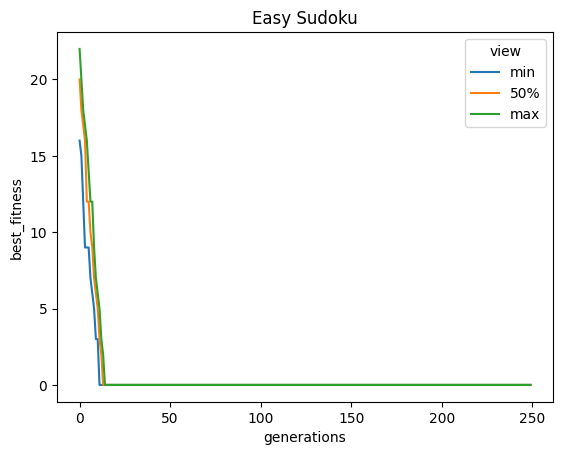

In [13]:
easy = grouped[grouped['difficulty'] == 'easy']
df_melted = easy.melt(id_vars='generations', value_vars=['min', '50%', 'max'], var_name='view', value_name='best_fitness')


sns.lineplot(data=df_melted, x='generations', y='best_fitness', hue='view').set_title('Easy Sudoku')
plt.show()

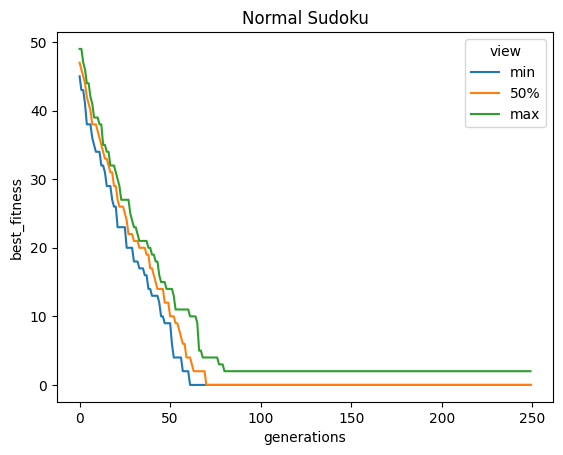

In [14]:
normal = grouped[grouped['difficulty'] == 'normal']
df_melted = normal.melt(id_vars='generations', value_vars=['min', '50%', 'max'], var_name='view', value_name='best_fitness')
sns.lineplot(data=df_melted, x='generations', y='best_fitness', hue='view').set_title('Normal Sudoku')
plt.show()

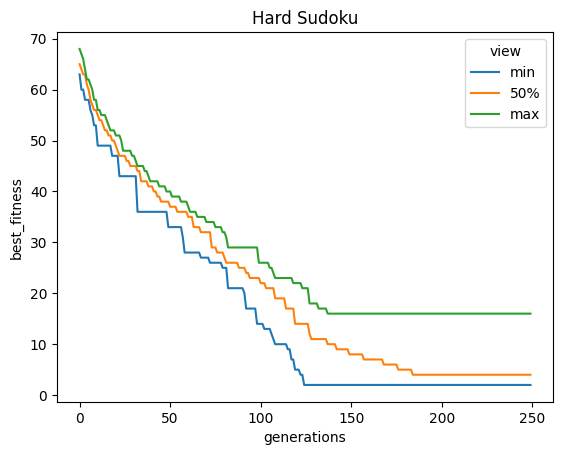

In [15]:
hard = grouped[grouped['difficulty'] == 'hard']
df_melted = hard.melt(id_vars='generations', value_vars=['min', '50%', 'max'], var_name='view', value_name='best_fitness')
sns.lineplot(data=df_melted, x='generations', y='best_fitness', hue='view').set_title('Hard Sudoku')
plt.show()